In [1]:
import pennylane as qml
import numpy as np

In [3]:
import pennylane as qml
from pennylane import numpy as np

symbols = ["H", "H"]
# setting the bond length
geometry = np.array([[0., 0., -0.66140414], [0., 0., 0.66140414]])

In [5]:
molecule = qml.qchem.Molecule(
    symbols,
    geometry,
    charge=0,
    mult=1,
    basis_name='sto-3g')

H, qubits = qml.qchem.molecular_hamiltonian(
    molecule,
    mapping='jordan_wigner',
    active_electrons=2,
    active_orbitals=2
)

In [45]:
import numpy as np
theta_values = np.linspace(-1, 1, num=1000)

In [67]:
electrons = 2
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)

[1 1 0 0]


In [9]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface="jax")
def circuit(param, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])
    return qml.expval(H)

In [47]:
energies = []
for theta in theta_values:
    energies.append(circuit(theta))

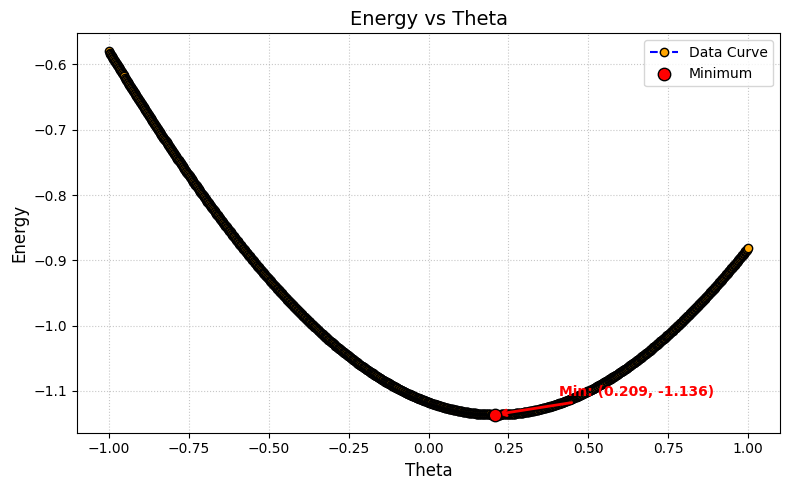

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose you already have:
# - theta_values: array of x-coordinates
# - energies: array of y-coordinates

min_index = np.argmin(energies)
x_min = theta_values[min_index]
y_min = energies[min_index]

plt.figure(figsize=(8, 5))

# 1. Plot a line connecting all data points for smoother visualization
plt.plot(theta_values, energies, color="blue", linestyle="--", marker="o", 
         markerfacecolor="orange", markeredgecolor="black", markersize=6, 
         label="Data Curve")

# 2. Highlight the minimum point
plt.scatter(x_min, y_min, color="red", zorder=5, s=80, edgecolor="black", 
            label="Minimum")

# 3. Annotate the minimum point
plt.annotate(
    f"Min: ({x_min:.3f}, {y_min:.3f})",
    xy=(x_min, y_min),
    xytext=(x_min + 0.2, y_min + 0.05*(max(energies) - min(energies))), 
    arrowprops=dict(arrowstyle="->", color="red", linewidth=2),
    fontsize=10,
    fontweight="bold",
    color="red"
)

# 4. Additional styling
plt.title("Energy vs Theta", fontsize=14)
plt.xlabel("Theta", fontsize=12)
plt.ylabel("Energy", fontsize=12)
plt.grid(True, linestyle=":", alpha=0.7)
plt.legend(fontsize=10, loc="best")
plt.tight_layout()
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()


In [75]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface="jax")
def circuit(param):
    qml.BasisState(hf, wires=range(qubits))
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])
    return qml.state() 
circuit(x_min)

D:\Programs\anaconda3\Lib\site-packages\jax\_src\numpy\array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Array([ 0.        +0.j,  0.        +0.j,  0.        +0.j, -0.10441394+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.9945339 +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j],      dtype=complex64)